In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

RED_IMAGE_FILE = '/mnt/data_disk/cgpData/card/card_r.dat'
GREEN_IMAGE_FILE = '/mnt/data_disk/cgpData/card/card_g.dat'
BLUE_IMAGE_FILE = '/mnt/data_disk/cgpData/card/card_b.dat'
LABEL_FILE = '/mnt/data_disk/cgpData/card/card_label.dat'
PREDICTION_FILE = '/home/mitchell/cgp/CGPExperiments/build/ckpt/2/predictions.dat'

IMAGE_WIDTH = 500
IMAGE_HEIGHT = 500
NUM_IMAGES = 9

(500, 500, 3)


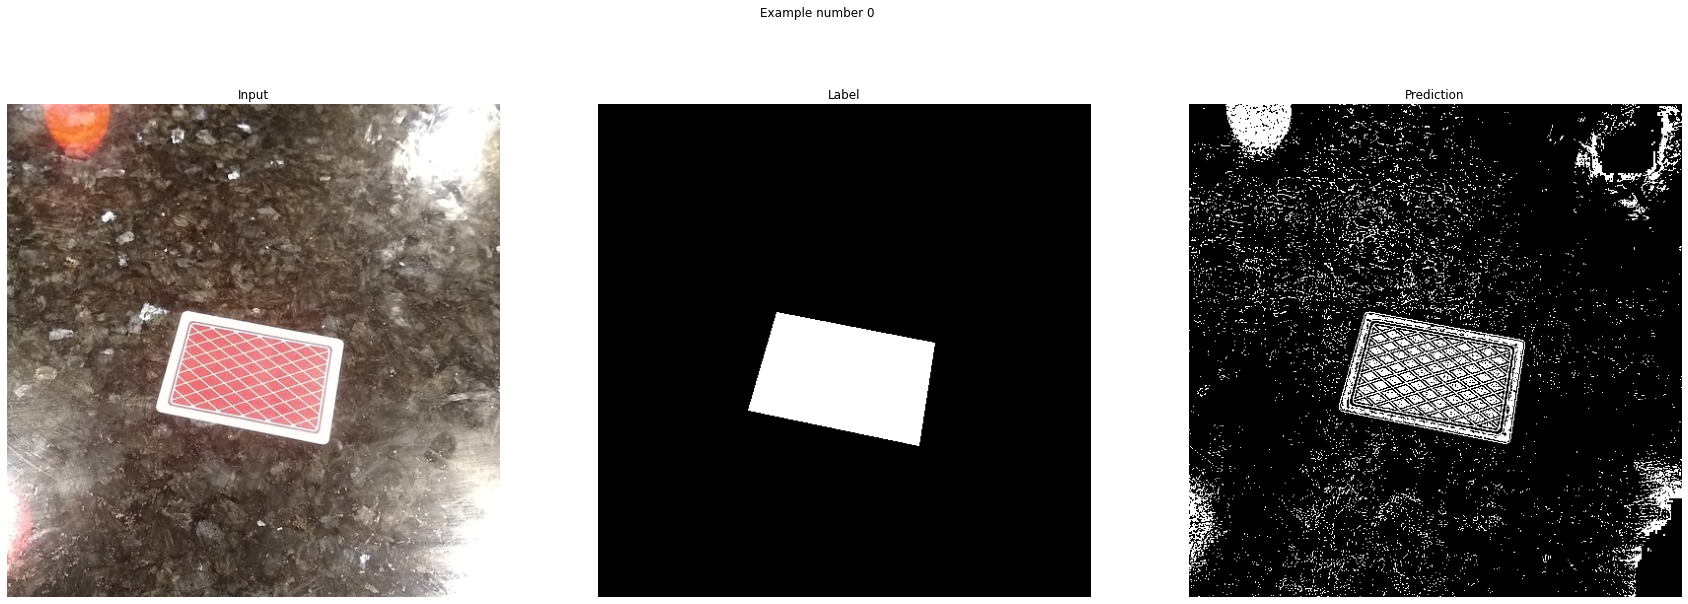

In [20]:
def load_bw_image(filename, image_num):
    image_size = IMAGE_WIDTH * IMAGE_HEIGHT
    offset = image_num * image_size
    with open(filename, 'rb') as f:
        f.seek(offset, 0)
        array = np.frombuffer(f.read(image_size), dtype=np.uint8).reshape(IMAGE_WIDTH, IMAGE_HEIGHT)
        return array
    
def plot_example(example_number):
    red_img = load_bw_image(RED_IMAGE_FILE, example_number)
    green_img = load_bw_image(GREEN_IMAGE_FILE, example_number)
    blue_img = load_bw_image(BLUE_IMAGE_FILE, example_number)
    label_img = load_bw_image(LABEL_FILE, example_number)
    prediction_img = load_bw_image(PREDICTION_FILE, example_number)
    
    val, prediction_thresh_img = cv2.threshold(prediction_img, 128, 255, cv2.THRESH_BINARY)
    
    color_image = np.zeros(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3), dtype=np.uint8)
    print(color_image.shape)
    color_image[:, :, 0] = red_img
    color_image[:, :, 1] = green_img
    color_image[:, :, 2] = blue_img
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    
    ax[0].imshow(color_image)
    ax[0].set_title('Input')
    
    ax[1].imshow(label_img, cmap='gray')
    ax[1].set_title('Label')
    
    ax[2].imshow(prediction_thresh_img, cmap='gray')
    ax[2].set_title('Prediction')
    
    for i in range(0, 3, 1):
        ax[i].set_axis_off()
        
    fig.suptitle('Example number {0}'.format(example_number))
    plt.show()
    
plot_example(0)